In [ ]:
!pip install bertviz
!pip install sklearn-crfsuite

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 7.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manyl

## Get data & load libraries

*   Uploading specific files from Google Drive to my Google Colab Notebook
*   Libraries loaded by trainer.py





In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# cd "/content/drive/MyDrive/CS5228/emotions/"

In [ ]:
# libraries for the files in google drive
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

processed_text_id = '13h01vbr-gAiBWrvjtzGFg6MQSM5USNuQ' #<-- You add in here the id from you google drive file, you can find it
processed_text_balanced_id = '1l2wnu5MURIfvE3-Bd4CCt6kzP8UzLJsU' #<-- You add in here the id from you google drive file, you can find it
processed_dialogues_id = '12tamLcWNuw0ixgh554XYosySoNy1JTeK' #<-- You add in here the id from you google drive file, you can find it
trainer_id = '1NLAUXAJc_AUGKfC_n8dmdKwEVNHkH_rZ' #<-- You add in here the id from you google drive file, you can find it

download = drive.CreateFile({'id': processed_text_id})
download.GetContentFile('processed_text.json')

download = drive.CreateFile({'id': processed_text_balanced_id})
download.GetContentFile('processed_text_balanced.json')

download = drive.CreateFile({'id': processed_dialogues_id})
download.GetContentFile('processed_dialogues.json')

download = drive.CreateFile({'id': trainer_id})
download.GetContentFile('trainer.py')

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
# import libraries for model training
# as well as retrieve data
# as well as functions for doing hyperparameter tuning
from trainer import *

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

## Cluster Analysis using TF-IDFs
- see if any interesting patterns (look at pure clusters, what bring them tgt)
- can also identify possible outliers
- use hierarchical clustering (can see at diff steps of merging)

In [ ]:
train = data[(data.split == "train")]
dev = data[(data.split == "dev")]
test = data[(data.split == "test")]

In [ ]:
def identity_tokenizer(text):
    return text

In [ ]:
# TF-IDF
tfidf_vectorizer = TfidfVectorizer(tokenizer=identity_tokenizer, lowercase=False, ngram_range=(1, 3), max_features=3000, max_df=0.1)
sentences_train, labels_train = train.text.tolist(), train.y.tolist()
X_train = tfidf_vectorizer.fit_transform(sentences_train)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


### Fine-grained Clustering

In [ ]:
clustering = AgglomerativeClustering(n_clusters = 8000).fit(X_train.toarray() )

In [ ]:
clusters= {}
for i, c in enumerate(clustering.labels_):
  if c not in clusters:
    clusters[c] = [i]
  else:
    clusters[c].append(i)

In [ ]:
merged_clusters = list(sorted(clusters.items(), key = lambda x: len(x[1]), reverse = True))[:10]

In [ ]:
for i in merged_clusters[-1][-1]:
  print(sentences_train[i], labels_train[i])

['really'] surprise
['really'] surprise


In [ ]:
# from upsampling fear probably
for i in merged_clusters[-2][-1]:
  print(sentences_train[i], labels_train[i])

['oh', 'no', 'no', 'no', 'no', 'oh', 'no', 'no', 'no', 'no', 'I', 'have', 'to', 'do', 'this', 'to', 'she'] fear
['oh', 'no', 'no', 'no', 'no', 'oh', 'no', 'no', 'no', 'no', 'I', 'have', 'to', 'do', 'this', 'to', 'she'] fear
['oh', 'no', 'no', 'no', 'no', 'oh', 'no', 'no', 'no', 'no', 'I', 'have', 'to', 'do', 'this', 'to', 'she'] fear


In [ ]:
# PROBLEM: SAME WORDS, DIFFERENT CLASS LABEL (PUNCTUATIONS ARE IMPT)
for i in merged_clusters[-4][-1]:
  print(train.raw.tolist()[i], sentences_train[i], labels_train[i])

maybe! ['maybe'] surprise
maybe? ['maybe'] neutral
maybe. ['maybe'] neutral
maybe. ['maybe'] neutral


In [ ]:
# PROBLEM: SAME WORDS, DIFFERENT CLASS LABEL (PUNCTUATIONS ARE IMPT)
for i in merged_clusters[-5][-1]:
  print(train.raw.tolist()[i], sentences_train[i], labels_train[i])

no! ['no'] joy
no! ['no'] joy
no! ['no'] joy
no? ['no'] surprise


In [ ]:
# PROBLEM: SAME WORDS, DIFFERENT CLASS LABEL (PUNCTUATIONS ARE IMPT)
for i in merged_clusters[-7][-1]:
  print(train.raw.tolist()[i], sentences_train[i], labels_train[i])

no no no! federal regulations! ['no', 'no', 'no', 'federal', 'regulation'] anger
no! no! no! ['no', 'no', 'no'] anger
no, no, no. ['no', 'no', 'no'] neutral
no no no! ['no', 'no', 'no'] fear
no no no! ['no', 'no', 'no'] fear
no no no! ['no', 'no', 'no'] fear


In [ ]:
# PROBLEM: SAME WORDS, DIFFERENT CLASS LABEL (PUNCTUATIONS ARE IMPT)
for i in merged_clusters[-9][-1]:
  print(train.raw.tolist()[i], sentences_train[i], labels_train[i])

all right!! ['all', 'right'] joy
all right? ['all', 'right'] anger
all right? ['all', 'right'] neutral
all right. ['all', 'right'] neutral
all right. ['all', 'right'] neutral
all right. ['all', 'right'] neutral
all right, bye-bye. ['all', 'right', 'byebye'] neutral
all right! ['all', 'right'] neutral
all right. ['all', 'right'] disgust
all right. ['all', 'right'] disgust
all right. ['all', 'right'] disgust
all right. ['all', 'right'] disgust
all right. ['all', 'right'] disgust
all right. ['all', 'right'] disgust


In [ ]:
# cnnt interpret
for i in merged_clusters[-10][-1]:
  print(sentences_train[i], labels_train[i])

['you', 'betcha'] joy
['and'] joy
['ehwh—excuse', 'I'] surprise
['ooooohh'] surprise
['oh'] surprise
['the', 'actress'] surprise
['oh', 'oop'] surprise
['I', 'ride', 'a', 'bike'] joy
['total', 'wuss'] sadness
['ahah'] surprise
['richard'] joy
['phil'] joy
['steven'] joy
['joelburg', 'you', 'maniac'] joy
['bing'] joy
['toby'] joy
['I'] surprise
['yuhhuh'] anger
['excellent'] joy
['do'] joy
['that', 'and', 'arrogance'] anger
['yuhhuh'] joy
['oh'] sadness
['sing'] anger
['tada'] joy
['oh'] surprise
['aha'] surprise
['waitress'] surprise
['ba', 'dum', 'bumb', 'cheshhh'] joy
['nichou', 'chima'] joy
['okaydokey'] sadness
['haha'] joy
['tequila'] joy
['yowza'] anger
['damnit'] anger
['barry'] surprise
['oh'] sadness
['oh'] surprise
['oh'] joy
['ehh'] surprise
['oh'] surprise
['byebye'] joy
['thread'] joy
['lean', 'lean', 'lean'] joy
['wh'] joy
['tramp'] surprise
['whooooaaaa'] surprise
['double', 'it'] joy
['fair', 'shmair'] sadness
['I', 'highly', 'doubt', 'that'] anger
['mazel', 'tov'] joy


### Coarse-grained Clustering

In [ ]:
clustering = AgglomerativeClustering(n_clusters = 10).fit(X_train.toarray())

In [ ]:
clusters= {}
for i, c in enumerate(clustering.labels_):
  if c not in clusters:
    clusters[c] = [i]
  else:
    clusters[c].append(i)

In [ ]:
merged_clusters = list(sorted(clusters.items(), key = lambda x: len(x[1]), reverse = True))

In [ ]:
train.iloc[[i for i in merged_clusters[-1][-1]]]

,s/n,diaID,uttID,split,y,sentiment,raw,clean,text,word_count,duration
3736,48,4,1,train,joy,positive,hi!,hi,[hi],1,0.137
3805,188,17,9,train,joy,positive,hi!,hi,[hi],1,1.127
3806,189,17,10,train,joy,positive,hi!,hi,[hi],1,0.138
3979,573,53,0,train,joy,positive,hi!,hi,[hi],1,2.418
4001,611,55,5,train,joy,positive,hi!,hi,[hi],1,1.334
4125,904,89,2,train,joy,positive,hi!,hi,[hi],1,1.376
4303,1377,142,1,train,joy,positive,"hi, julie!",hi julie,"[hi, julie]",2,2.46
4373,1520,155,3,train,joy,positive,oh hi!,oh hi,"[oh, hi]",2,1.711
4374,1521,155,4,train,joy,positive,hi!,hi,[hi],1,0.954
4548,1883,187,2,train,joy,positive,hi!,hi,[hi],1,1.084


In [ ]:
train.iloc[[i for i in merged_clusters[-2][-1]]]

,s/n,diaID,uttID,split,y,sentiment,raw,clean,text,word_count,duration
3720,13,0,12,train,surprise,positive,really?!,really,[really],1,3.045
3783,146,14,3,train,surprise,positive,really?!,really,[really],1,2.802
3835,251,24,4,train,surprise,positive,really!?,really,[really],1,1.125
3841,267,25,11,train,surprise,positive,really?,really,[really],1,1.084
4049,701,65,1,train,surprise,positive,really?,really,[really],1,1.584
4094,818,79,3,train,surprise,positive,really?,really,[really],1,0.712
4165,1013,103,2,train,surprise,positive,really?,really,[really],1,3.794
4268,1273,129,6,train,surprise,negative,really. what?,really what,"[really, what]",2,0.751
4306,1387,144,4,train,surprise,positive,really?,really,[really],1,0.552
4348,1471,151,8,train,anger,negative,really?,really,[really],1,2.0


In [ ]:
train.iloc[[i for i in merged_clusters[-3][-1]]]

,s/n,diaID,uttID,split,y,sentiment,raw,clean,text,word_count,duration
3808,195,18,5,train,joy,positive,okay!,okay,[okay],1,1.501
3900,397,38,2,train,joy,positive,okay!,okay,[okay],1,0.71
3962,534,50,2,train,surprise,positive,okay!,okay,[okay],1,0.312
4233,1202,123,2,train,anger,negative,okay?,okay,[okay],1,0.219
5898,4930,503,7,train,joy,positive,okay!,okay,[okay],1,0.751
6512,6301,630,6,train,joy,positive,okay!,okay,[okay],1,0.392
6539,6366,636,0,train,joy,positive,okay!,okay,[okay],1,0.712
6769,6932,680,8,train,joy,positive,okay!,okay,[okay],1,2.335
7141,7694,772,9,train,joy,positive,okay!,okay,[okay],1,1.5
7143,7696,772,11,train,joy,positive,okay!,okay,[okay],1,1.792


In [ ]:
train.iloc[[i for i in merged_clusters[-4][-1]]]

,s/n,diaID,uttID,split,y,sentiment,raw,clean,text,word_count,duration
3762,96,8,6,train,joy,positive,thank you. thank you. thank you! and,thank you thank you thank you and,"[thank, you, thank, you, thank, you, and]",7,0.14
3827,233,21,13,train,joy,positive,thanks.,thanks,[thank],1,1.275
3893,357,35,4,train,joy,positive,thank you ross.,thank you ross,"[thank, you, ross]",3,0.958
4462,1714,174,1,train,joy,positive,thank you!,thank you,"[thank, you]",2,0.337
4551,1890,187,9,train,joy,positive,thanks! you too.,thanks you too,"[thank, you, too]",3,1.208
4575,1953,195,4,train,joy,positive,thank you.,thank you,"[thank, you]",2,2.461
4587,1983,198,2,train,joy,positive,left! thank you.,left thank you,"[leave, thank, you]",3,4.838
4767,2400,236,14,train,joy,positive,thanks.,thanks,[thank],1,0.477
5024,2968,297,1,train,joy,positive,"oh. thank you. ohhh, thank you very much. oh, ...",oh thank you ohhh thank you very much oh thank...,"[oh, thank, you, ohhh, thank, you, very, much,...",17,6.005
5513,4026,411,3,train,joy,positive,thank god.,thank god,"[thank, god]",2,1.542


In [ ]:
train.iloc[[i for i in merged_clusters[-5][-1]]]

,s/n,diaID,uttID,split,y,sentiment,raw,clean,text,word_count,duration
3735,47,4,0,train,surprise,positive,hey!,hey,[hey],1,0.96
3903,402,38,7,train,surprise,positive,hey!,hey,[hey],1,0.501
4153,977,99,0,train,joy,positive,hey!,hey,[hey],1,0.668
4154,978,99,1,train,joy,positive,hey!,hey,[hey],1,1.238
4491,1781,180,0,train,joy,positive,hey!,hey,[hey],1,1.127
...,...,...,...,...,...,...,...,...,...,...,...
9553,9797,975,2,train,neutral,neutral,hey.,hey,[hey],1,0.969
9568,4051,414,1,train,neutral,neutral,hey!,hey,[hey],1,0.222
9577,7079,700,0,train,neutral,neutral,hey!,hey,[hey],1,1.001
9647,2658,264,0,train,neutral,neutral,hey.,hey,[hey],1,1.084


## RoBERTa classification:
Take note, might need more gpu and/or restart session to free up space.

1.   Hyperparameter Tuning for Binary Classification (Upperbound)
2.   Multi-class Classification
3.   Multi-class Classification (w previous utterances as context)



### Hyperparameter Tuning for Binary Classification (Upperbound)
* This step code is in "trainer.py".
* Need to change the target (emotion) accordingly in the script.
```
nohup python trainer.py >> logs/anger_log.txt &
nohup python trainer.py >> logs/joy_log.txt &
nohup python trainer.py >> logs/surprise_log.txt &
nohup python trainer.py >> logs/sadness_log.txt &
nohup python trainer.py >> logs/fear_log.txt &
nohup python trainer.py >> logs/disgust_log.txt &
```
* Results in "logs" folder.
  * Example, "joy_log.txt", "surprise_log.txt", "anger_log.txt"
  * The evaluation on the test set is located at the bottom of each file.

### Multi-Class Classification
Never do hyperparameter tuning. Not much difference, except some extreme hyperparamter values to avoid.

In [ ]:
# data split
train = data[data.split == "train"]
dev = data[data.split == "dev"]
test = data[data.split == "test"]
num_labels = len(np.unique(train.y))

In [ ]:
# tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(model_path, do_lower_case=True)
model = AutoModelForSequenceClassification.from_pretrained(model_path, num_labels=num_labels).to("cuda")

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at FacebookAI/roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# dataset and dataloader
label_mapper = {y: i for i, y in enumerate(np.unique(train.y))}
MAX_LEN = 70
BATCH_SIZE = 128

train_dataloader = create_data_loader(train, tokenizer, MAX_LEN, BATCH_SIZE, label_mapper, 'train')
validation_dataloader = create_data_loader(dev, tokenizer, MAX_LEN, BATCH_SIZE, label_mapper, 'val')
test_dataloader = create_data_loader(test, tokenizer, MAX_LEN, BATCH_SIZE, label_mapper, 'val')

label_mapper

{'anger': 0,
 'disgust': 1,
 'fear': 2,
 'joy': 3,
 'neutral': 4,
 'sadness': 5,
 'surprise': 6}

In [ ]:
# loss and optimizer
EPOCHS = 10

optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # 2e-4
                  eps = 1e-8)

# Total number of training steps is [number of batches] x [number of epochs].
total_steps = len(train_dataloader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = total_steps * 0.05, # total_steps * 0.05
                                            num_training_steps = total_steps)
class_weights = compute_class_weight(class_weight="balanced", classes=np.array(range(len(label_mapper))), y=(train['y'].map(label_mapper)).tolist())
criterion = nn.CrossEntropyLoss(weight = torch.tensor(class_weights, dtype = torch.float)).to("cuda")

print(class_weights)

[1.06067242 1.178643   1.178643   0.67486272 0.78523746 1.72223384
 0.97617072]


In [ ]:
# training
RANDOM_SEED = 2024
random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed_all(RANDOM_SEED)

# We'll store a number of quantities such as training and validation loss,
# validation accuracy, and timings.
training_stats = []
best_f1 = 0
best_epoch = None

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(EPOCHS):

    # ========================================
    #               Training
    # ========================================

    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, EPOCHS))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update
        if step % 20 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)

            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader.
        # `batch` contains three pytorch tensors:
        #   [0]: input ids
        #   [1]: attention masks
        #   [2]: labels
        b_input_ids = batch['input_ids'].to("cuda")
        b_input_mask = batch['attention_mask'].to("cuda")
        b_labels = batch['labels'].to("cuda")

        # Perform a forward pass (evaluate the model on this training batch).
        # Specifically, we'll get the loss (because we provided labels) and the
        # "logits"--the model outputs prior to activation.
        y_pred = model(input_ids=b_input_ids, attention_mask=b_input_mask)

        # Get the loss and "logits" output by the model.
        logits = y_pred.logits
        loss = criterion(logits, b_labels)

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end.
        total_train_loss += loss.item()

        # Always clear any previously calculated gradients before performing a
        # backward pass.
        optimizer.zero_grad()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)

    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))

    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables
    total_eval_loss = 0
    predictions, true_labels = [], []

    # Evaluate data for one epoch
    for batch in validation_dataloader:

        # Unpack this training batch from our dataloader.
        # `batch` contains three pytorch tensors:
        #   [0]: input ids
        #   [1]: attention masks
        #   [2]: labels
        b_input_ids = batch['input_ids'].to("cuda")
        b_input_mask = batch['attention_mask'].to("cuda")
        b_labels = batch['labels'].to("cuda")

        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():

            # Forward pass, calculate logit predictions.
            y_val = model(input_ids=b_input_ids, attention_mask=b_input_mask)

        # Get the loss and "logits" output by the model.
        logits = y_val.logits
        loss = criterion(logits, b_labels)

        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu()
        label_ids = b_labels.to('cpu')

        # Store predictions and true labels (only used to evaluate last epoch)
        predictions.extend(logits)
        true_labels.extend(label_ids)


    # Report the final accuracy for this validation run.
    predictions = torch.argmax(torch.stack(predictions), 1)
    true_labels = torch.stack(true_labels)
    f1 = f1_score(true_labels, predictions, average = "macro")
    print("  Valition F1 score: {0:.2f}".format(f1))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)

    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)

    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. F1 score.': f1,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

    if f1 > best_f1:
        torch.save(model.state_dict(), 'model.pt') ###
        best_f1 = f1
        best_epoch = epoch_i + 1

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))

print("Best F1 is", best_f1, "at", best_epoch)


======== Epoch 1 / 10 ========
Training...
  Batch    20  of     65.    Elapsed: 0:00:07.
  Batch    40  of     65.    Elapsed: 0:00:13.
  Batch    60  of     65.    Elapsed: 0:00:19.

  Average training loss: 1.85
  Training epcoh took: 0:00:21

Running Validation...
  Valition F1 score: 0.36
  Validation Loss: 1.59
  Validation took: 0:00:01

======== Epoch 2 / 10 ========
Training...
  Batch    20  of     65.    Elapsed: 0:00:06.
  Batch    40  of     65.    Elapsed: 0:00:12.
  Batch    60  of     65.    Elapsed: 0:00:19.

  Average training loss: 1.43
  Training epcoh took: 0:00:20

Running Validation...
  Valition F1 score: 0.40
  Validation Loss: 1.40
  Validation took: 0:00:01

======== Epoch 3 / 10 ========
Training...
  Batch    20  of     65.    Elapsed: 0:00:06.
  Batch    40  of     65.    Elapsed: 0:00:12.
  Batch    60  of     65.    Elapsed: 0:00:19.

  Average training loss: 1.16
  Training epcoh took: 0:00:20

Running Validation...
  Valition F1 score: 0.42
  Validati

<Axes: xlabel='epochs'>

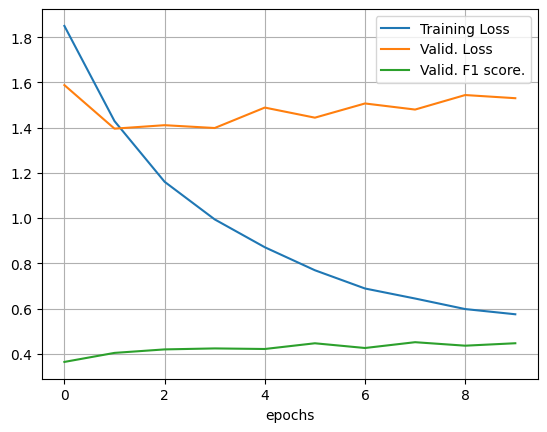

In [ ]:
stats_df = pd.DataFrame(training_stats)[["Training Loss", "Valid. Loss", "Valid. F1 score."]]
stats_df.plot(xlabel = "epochs", grid = True)

In [ ]:
# evaluation
model = AutoModelForSequenceClassification.from_pretrained(model_path, num_labels=num_labels)
model.load_state_dict(torch.load('model.pt')) ###
model.to("cuda")
model.eval()

# Report the number of sentences.
print('Number of test sentences: {:,}\n'.format(test.shape[0]))

# Tracking variables
predictions, true_labels = [], []

# Predict
for batch in test_dataloader:
    # Add batch to GPU
    # Unpack the inputs from our dataloader
    b_input_ids = batch['input_ids'].to("cuda")
    b_input_mask = batch['attention_mask'].to("cuda")
    b_labels = batch['labels'].to("cuda")

    # Telling the model not to compute or store gradients, saving memory and
    # speeding up prediction
    with torch.no_grad():
        # Forward pass, calculate logit predictions.
        y_val = model(input_ids=b_input_ids, attention_mask=b_input_mask)

    logits = y_val.logits

    # Move logits and labels to CPU
    logits = logits.detach().cpu()
    label_ids = b_labels.to('cpu')

    # Store predictions and true labels
    predictions.extend(logits)
    true_labels.extend(label_ids)

predictions = torch.argmax(torch.stack(predictions), 1)
true_labels = torch.stack(true_labels)

print('DONE.')

### Can edit your evaluation metric here
print(f1_score(true_labels, predictions, average = "macro"))
print(classification_report(true_labels, predictions, target_names = list(label_mapper.keys())))

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at FacebookAI/roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Number of test sentences: 2,610

DONE.
0.4271398912047228
              precision    recall  f1-score   support

       anger       0.48      0.45      0.46       345
     disgust       0.20      0.24      0.22        68
        fear       0.11      0.30      0.16        50
         joy       0.52      0.63      0.57       402
     neutral       0.82      0.61      0.70      1256
     sadness       0.28      0.39      0.33       208
    surprise       0.49      0.63      0.55       281

    accuracy                           0.56      2610
   macro avg       0.41      0.46      0.43      2610
weighted avg       0.62      0.56      0.58      2610



### Multi-class Classification (w previous utterances as context)
We feed in previous 3 utterances as context for pedicting emotion of current utterance.

In [ ]:
# data splits
data_no_bal = pd.DataFrame(data_no_bal)
train = data_no_bal[data_no_bal.split == "train"]
dev = data_no_bal[data_no_bal.split == "dev"]
test = data_no_bal[data_no_bal.split == "test"]
num_labels = len(np.unique(train.y))

In [ ]:
# get previous 3 utterances
def get_contexts(df):
  dialogues = {}
  for d, r, y in zip(df.diaID, df.raw, df.y):
    if d not in dialogues:
      dialogues[d] = {"utterances": [r], "y": [y]}
    else:
      dialogues[d]["utterances"].append(r)
      dialogues[d]["y"].append(y)

  for d in dialogues:
    contexts = []
    for i in range(len(dialogues[d]["utterances"])):
      if i == 0:
        contexts.append("")
      elif i == 1:
        contexts.append(" ".join(dialogues[d]["utterances"][:1]))
      elif i == 2:
        contexts.append(" ".join(dialogues[d]["utterances"][:2]))
      else:
        contexts.append(" ".join(dialogues[d]["utterances"][i-3:i]))
    dialogues[d]["contexts"] = contexts

  utterances = []
  y = []
  contexts = []
  for d in dialogues:
    for i in range(len(dialogues[d]["utterances"])):
      utterances.append(dialogues[d]["utterances"][i])
      y.append(dialogues[d]["y"][i])
      contexts.append(dialogues[d]["contexts"][i])
  df = pd.DataFrame()
  df["raw"] = utterances
  df["y"] = y
  df["contexts"] = contexts
  return df

In [ ]:
train = get_contexts(train)
dev = get_contexts(dev)
test = get_contexts(test)

In [ ]:
class myDataset(Dataset):

    def __init__(self, X, C, y, tokenizer, max_len, label_mapper):
        self.X = X
        self.C = C
        self.y = y
        self.tokenizer = tokenizer
        self.max_len = max_len
        self.label_mapper = label_mapper

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        x = str(self.X[idx])
        c = str(self.C[idx])
        encoding = self.tokenizer.encode_plus(
            c, x, ###
            add_special_tokens = True,
            max_length = self.max_len,
            padding = 'max_length',
            truncation = 'longest_first',
            return_attention_mask = True,
            return_token_type_ids = False,
            return_tensors = 'pt'
        )
        return{
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(self.label_mapper[self.y[idx]], dtype = torch.long)
        }

def create_data_loader(some_df, tokenizer, max_len, batch_size, label_mapper, purpose):
    ds = myDataset(
        X = some_df.raw.to_numpy(),
        C = some_df.contexts.to_numpy(),
        y = some_df.y.to_numpy(),
        tokenizer = tokenizer,
        max_len = max_len,
        label_mapper = label_mapper
    )
    if purpose == 'train':
        return DataLoader(
            ds,
            batch_size = batch_size,
            sampler = RandomSampler(ds),
            num_workers = 2
        )
    if purpose == 'val':
        return DataLoader(
            ds,
            batch_size = batch_size,
            sampler = SequentialSampler(ds),
            num_workers = 2
        )

In [ ]:
# dataset and dataloader
label_mapper = {y: i for i, y in enumerate(np.unique(train.y))}
MAX_LEN = 140 ###
BATCH_SIZE = 256 ###

train_dataloader = create_data_loader(train, tokenizer, MAX_LEN, BATCH_SIZE, label_mapper, 'train')
validation_dataloader = create_data_loader(dev, tokenizer, MAX_LEN, BATCH_SIZE, label_mapper, 'val')
test_dataloader = create_data_loader(test, tokenizer, MAX_LEN, BATCH_SIZE, label_mapper, 'val')

label_mapper

{'anger': 0,
 'disgust': 1,
 'fear': 2,
 'joy': 3,
 'neutral': 4,
 'sadness': 5,
 'surprise': 6}

In [ ]:
# model
tokenizer = AutoTokenizer.from_pretrained(model_path, do_lower_case=True)
model = AutoModelForSequenceClassification.from_pretrained(model_path, num_labels=num_labels).to("cuda")

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at /home/users/nus/e1329380/scratch/models/models--FacebookAI--roberta-base/snapshots/e2da8e2f811d1448a5b465c236feacd80ffbac7b and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# loss and optimizer
EPOCHS = 10

optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # 2e-4
                  eps = 1e-8)

# Total number of training steps is [number of batches] x [number of epochs].
total_steps = len(train_dataloader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = total_steps * 0.05, # total_steps * 0.05
                                            num_training_steps = total_steps)
class_weights = compute_class_weight(class_weight="balanced", classes=np.array(range(len(label_mapper))), y=(train['y'].map(label_mapper)).tolist())
criterion = nn.CrossEntropyLoss(weight = torch.tensor(class_weights, dtype = torch.float)).to("cuda")

print(class_weights)

[1.28674482 5.26568266 5.32462687 0.81870338 0.3029724  2.08931186
 1.18423237]


In [ ]:
# training
RANDOM_SEED = 2024
random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed_all(RANDOM_SEED)

# We'll store a number of quantities such as training and validation loss,
# validation accuracy, and timings.
training_stats = []
best_f1 = 0
best_epoch = None

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(EPOCHS):

    # ========================================
    #               Training
    # ========================================

    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, EPOCHS))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update
        if step % 30 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)

            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader.
        # `batch` contains three pytorch tensors:
        #   [0]: input ids
        #   [1]: attention masks
        #   [2]: labels
        b_input_ids = batch['input_ids'].to("cuda")
        b_input_mask = batch['attention_mask'].to("cuda")
        b_labels = batch['labels'].to("cuda")

        # Perform a forward pass (evaluate the model on this training batch).
        # Specifically, we'll get the loss (because we provided labels) and the
        # "logits"--the model outputs prior to activation.
        y_pred = model(input_ids=b_input_ids, attention_mask=b_input_mask)

        # Get the loss and "logits" output by the model.
        logits = y_pred.logits
        loss = criterion(logits, b_labels)

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end.
        total_train_loss += loss.item()

        # Always clear any previously calculated gradients before performing a
        # backward pass.
        optimizer.zero_grad()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)

    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))

    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables
    total_eval_loss = 0
    predictions, true_labels = [], []

    # Evaluate data for one epoch
    for batch in validation_dataloader:

        # Unpack this training batch from our dataloader.
        # `batch` contains three pytorch tensors:
        #   [0]: input ids
        #   [1]: attention masks
        #   [2]: labels
        b_input_ids = batch['input_ids'].to("cuda")
        b_input_mask = batch['attention_mask'].to("cuda")
        b_labels = batch['labels'].to("cuda")

        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():

            # Forward pass, calculate logit predictions.
            y_val = model(input_ids=b_input_ids, attention_mask=b_input_mask)

        # Get the loss and "logits" output by the model.
        logits = y_val.logits
        loss = criterion(logits, b_labels)

        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu()
        label_ids = b_labels.to('cpu')

        # Store predictions and true labels (only used to evaluate last epoch)
        predictions.extend(logits)
        true_labels.extend(label_ids)


    # Report the final accuracy for this validation run.
    predictions = torch.argmax(torch.stack(predictions), 1)
    true_labels = torch.stack(true_labels)
    f1 = f1_score(true_labels, predictions, average = "macro")
    print("  Valition F1 score: {0:.2f}".format(f1))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)

    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)

    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. F1 score.': f1,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

    if f1 > best_f1:
        torch.save(model.state_dict(), 'model.pt') ###
        best_f1 = f1
        best_epoch = epoch_i + 1

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))

print("Best F1 is", best_f1, "at", best_epoch)


======== Epoch 1 / 10 ========
Training...
  Batch    30  of     40.    Elapsed: 0:00:38.

  Average training loss: 1.94
  Training epcoh took: 0:00:50

Running Validation...
  Valition F1 score: 0.19
  Validation Loss: 1.90
  Validation took: 0:00:02

======== Epoch 2 / 10 ========
Training...
  Batch    30  of     40.    Elapsed: 0:00:37.

  Average training loss: 1.77
  Training epcoh took: 0:00:49

Running Validation...
  Valition F1 score: 0.33
  Validation Loss: 1.64
  Validation took: 0:00:02

======== Epoch 3 / 10 ========
Training...
  Batch    30  of     40.    Elapsed: 0:00:37.

  Average training loss: 1.48
  Training epcoh took: 0:00:49

Running Validation...
  Valition F1 score: 0.41
  Validation Loss: 1.46
  Validation took: 0:00:02

======== Epoch 4 / 10 ========
Training...
  Batch    30  of     40.    Elapsed: 0:00:37.

  Average training loss: 1.35
  Training epcoh took: 0:00:49

Running Validation...
  Valition F1 score: 0.43
  Validation Loss: 1.45
  Validation to

<Axes: xlabel='epochs'>

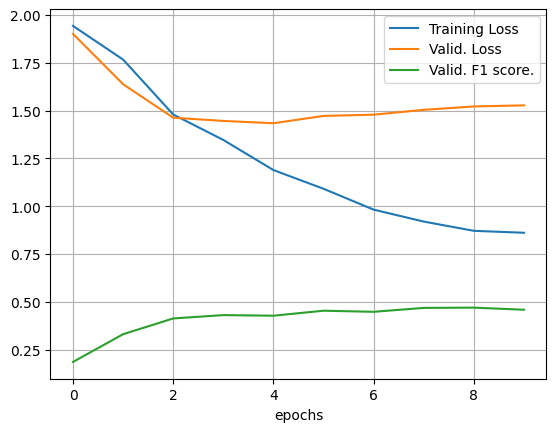

In [ ]:
stats_df = pd.DataFrame(training_stats)[["Training Loss", "Valid. Loss", "Valid. F1 score."]]
stats_df.plot(xlabel = "epochs", grid = True)

In [ ]:
# evaluation
model = AutoModelForSequenceClassification.from_pretrained(model_path, num_labels=num_labels)
model.load_state_dict(torch.load('model.pt')) ###
model.to("cuda")
model.eval()

# Report the number of sentences.
print('Number of test sentences: {:,}\n'.format(test.shape[0]))

# Tracking variables
predictions, true_labels = [], []

# Predict
for batch in test_dataloader:
    # Add batch to GPU
    # Unpack the inputs from our dataloader
    b_input_ids = batch['input_ids'].to("cuda")
    b_input_mask = batch['attention_mask'].to("cuda")
    b_labels = batch['labels'].to("cuda")

    # Telling the model not to compute or store gradients, saving memory and
    # speeding up prediction
    with torch.no_grad():
        # Forward pass, calculate logit predictions.
        y_val = model(input_ids=b_input_ids, attention_mask=b_input_mask)

    logits = y_val.logits

    # Move logits and labels to CPU
    logits = logits.detach().cpu()
    label_ids = b_labels.to('cpu')

    # Store predictions and true labels
    predictions.extend(logits)
    true_labels.extend(label_ids)

predictions = torch.argmax(torch.stack(predictions), 1)
true_labels = torch.stack(true_labels)

print('DONE.')

### Can edit your evaluation metric here
print(f1_score(true_labels, predictions, average = "macro"))
print(classification_report(true_labels, predictions, target_names = list(label_mapper.keys())))

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at /home/users/nus/e1329380/scratch/models/models--FacebookAI--roberta-base/snapshots/e2da8e2f811d1448a5b465c236feacd80ffbac7b and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Number of test sentences: 2,610

DONE.
0.44072144412214026
              precision    recall  f1-score   support

       anger       0.50      0.37      0.42       345
     disgust       0.18      0.38      0.24        68
        fear       0.12      0.42      0.18        50
         joy       0.55      0.64      0.60       402
     neutral       0.84      0.59      0.69      1256
     sadness       0.38      0.47      0.42       208
    surprise       0.44      0.66      0.53       281

    accuracy                           0.56      2610
   macro avg       0.43      0.51      0.44      2610
weighted avg       0.64      0.56      0.58      2610



### BERT visualisation of attention
* To run codes below, you need to have trained your multiclass model.
* We already ran the code below and store the output in "data/model output/train_get_attention.txt".

In [ ]:
utils.logging.set_verbosity_error()  # Suppress standard warnings

In [ ]:
with open("data/model output/train_get_attention.txt", "a") as f:
    f.write("\n**Analyse important words**\n")
    if target == "joy":
        looping = ["Feeling happy today, hehe.", "This is so delicious", "oh my gosh congratulations"]
        attn_heads = [0,5,7]
        last_layer = 11
    elif target == "anger":
        looping = ["what the fuck you are doing", "what the shit is this", "i hate you alot", "what the hell is this"]
        attn_heads = [5,6,7]
        last_layer = 11
    elif target == "surprise":
        looping = ["oh my gosh, what happened", "wow this is a whole new level", "this is way too shocking"]
        attn_heads = [0,1,3]
        last_layer = 11
    cls_id = 0

    for t in looping:
        input_text = t
        # print(t)
        f.write(f"\nText: {t}")
        model = AutoModelForSequenceClassification.from_pretrained(model_path, output_attentions=True)
        model.load_state_dict(torch.load('model.pt'))
        tokenizer = AutoTokenizer.from_pretrained(model_path)
        inputs = tokenizer.encode(input_text, return_tensors='pt')  # Tokenize input text
        outputs = model(inputs)  # Run model
        # print(outputs.logits.tolist()[0])
        f.write(f"\nPrediction: {outputs.logits.tolist()[0]}")
        attention = outputs[-1]  # Retrieve attention from model outputs
        tokens = tokenizer.convert_ids_to_tokens(inputs[0])  # Convert input ids to token strings
        # print(tokens[1:-1])
        f.write(f"\nTokens: {tokens[1:-1]}")
        # head_view([a for a in attention], tokens)  # Display model view (look at layer 11)
        # print()
        for attn_head in attn_heads:
            # raw attention weights
            extracted_attention_weights = attention[last_layer][0][attn_head][cls_id][1:-1]
            # print(extracted_attention_weights.tolist())
            # print(tokens[1:-1][torch.argmax(extracted_attention_weights, dim = -1)])
            f.write(f"\nAttention score of [CLS] token to input tokens at layer 12 (attention heads: {attn_heads}):\n{extracted_attention_weights.tolist()}")
            f.write(f"\nMost important word: {tokens[1:-1][torch.argmax(extracted_attention_weights, dim = -1)]}\n")

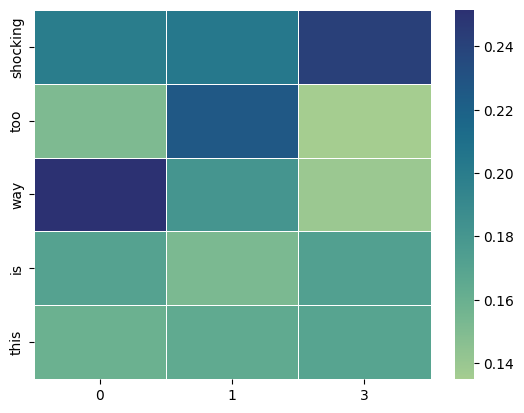

In [ ]:
# visualisation (generating for report only) (manual get attention scores from "data/model output/train_get_attention.txt"...)
data = pd.DataFrame({0: [0.15946561098098755, 0.17060978710651398, 0.2515510618686676, 0.15105822682380676, 0.19993439316749573],
                    1: [0.1648099273443222, 0.1522936373949051, 0.1807902753353119, 0.22638626396656036, 0.20308244228363037],
                    3: [0.1696738451719284, 0.172567680478096, 0.13917580246925354, 0.13495756685733795, 0.2417575567960739]})
# sns.heatmap(data)
ax = sns.heatmap(data, linewidth=.5, annot=False, cmap="crest", yticklabels=['this', 'is', 'way', 'too', 'shocking'])
# ax.set(xlabel="Attention heads in layer 12", ylabel="Tokens")
ax.invert_yaxis()

## Analyse possible emotion patterns in dialogues

In [ ]:
df = pd.DataFrame(data_diag)
train_df = df[df["split"] == "train"]
emotions_by_dialogue = train_df["y"].tolist()
emotions_by_dialogue = [" ".join(d) for d in emotions_by_dialogue]

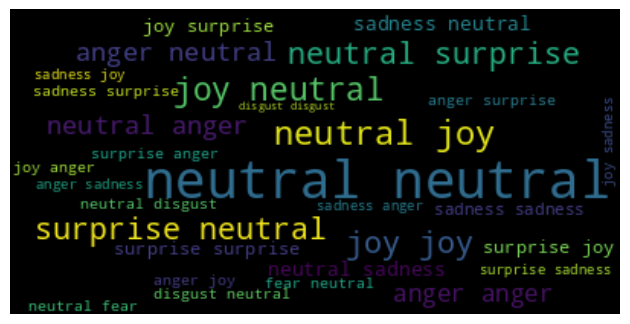

In [ ]:
# create sequence of emotions in each dialogue (consecutive), CountVectorizer
vectorizer = CountVectorizer(ngram_range = (2,2))
X = vectorizer.fit_transform(emotions_by_dialogue)
features = vectorizer.get_feature_names_out()
X = X.toarray()
occurrence = np.sum(X, axis = 0)
pairs = [(f,o) for f, o in zip(features, occurrence)]
# # only keep transitions (dropped no transtion)
# pairs = [p for p in pairs if len(set(p[0].split())) > 1]
# pairs.sort(reverse = True, key = lambda x: x[1])
# pairs

# Word-Cloud
wc = WordCloud(background_color="black", max_words=30, contour_width=0) ###
wc.generate_from_frequencies(dict(pairs))
plt.figure()
# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
pairs.sort(reverse = True, key = lambda x: x[1])
pairs

[('neutral neutral', 2354),
 ('neutral joy', 631),
 ('joy neutral', 602),
 ('joy joy', 520),
 ('neutral surprise', 500),
 ('surprise neutral', 492),
 ('anger neutral', 358),
 ('neutral anger', 352),
 ('anger anger', 314),
 ('neutral sadness', 212),
 ('sadness neutral', 206),
 ('surprise surprise', 179),
 ('surprise joy', 167),
 ('joy surprise', 165),
 ('sadness sadness', 147),
 ('joy anger', 116),
 ('surprise anger', 113),
 ('anger joy', 107),
 ('fear neutral', 100),
 ('neutral disgust', 97),
 ('anger surprise', 95),
 ('neutral fear', 93),
 ('disgust neutral', 86),
 ('sadness surprise', 86),
 ('surprise sadness', 77),
 ('joy sadness', 72),
 ('anger sadness', 70),
 ('sadness joy', 65),
 ('sadness anger', 63),
 ('disgust disgust', 38),
 ('joy fear', 36),
 ('joy disgust', 35),
 ('disgust anger', 33),
 ('fear anger', 33),
 ('disgust surprise', 32),
 ('fear joy', 32),
 ('anger fear', 30),
 ('surprise fear', 30),
 ('fear fear', 28),
 ('surprise disgust', 28),
 ('fear surprise', 27),
 ('anger

## Modelling emotions in dialogues using RNN model
* feed RoBERTa [CLS] token of each utterance into a RNN/LSTM unit
* do sequence labelling (many to many), predict emotion for each utterance
* to calculate loss at each time step
* and then aggregate finally back propagate loss

In [ ]:
df = pd.DataFrame(data_diag)
train_df = df[df["split"] == "train"]
dev_df = df[df["split"] == "dev"]
test_df = df[df["split"] == "test"]

In [ ]:
### create pytorch dataset and tokenize
class EqualLengthsBatchSampler(Sampler):

    def __init__(self, batch_size, inputs, targets):

        # Throw an error if the number of inputs and targets don't match
        if targets is not None:
            if len(inputs) != len(targets):
                raise Exception("[EqualLengthsBatchSampler] inputs and targets have different sizes")

        # Remember batch size and number of samples
        self.batch_size, self.num_samples = batch_size, len(inputs)

        self.unique_length_pairs = set()
        self.lengths_to_samples = {}

        for i in range(0, len(inputs)):
            len_input = len(inputs[i])
            try:
                # Fails if targets[i] is not a sequence but a scalar (e.g., a class label)
                len_target = len(targets[i])
            except:
                # In case of failure, we just the length to 1 (value doesn't matter, it only needs to be a constant)
                len_target = 1

            # Add length pair to set of all seen pairs
            self.unique_length_pairs.add((len_input, len_target))

            # For each lengths pair, keep track of which sample indices for this pair
            # E.g.: self.lengths_to_sample = { (4,5): [3,5,11], (5,5): [1,2,9], ...}
            if (len_input, len_target) in self.lengths_to_samples:
                self.lengths_to_samples[(len_input, len_target)].append(i)
            else:
                self.lengths_to_samples[(len_input, len_target)] = [i]

        # Convert set of unique length pairs to a list so we can shuffle it later
        self.unique_length_pairs = list(self.unique_length_pairs)


    def __len__(self):
        return self.num_samples

    def __iter__(self):

        # Shuffle list of unique length pairs
        np.random.shuffle(self.unique_length_pairs)

        # Iterate over all possible sentence length pairs
        for length_pair in self.unique_length_pairs:

            # Get indices of all samples for the current length pairs
            # for example, all indices with a lenght pair of (8,7)
            sequence_indices = self.lengths_to_samples[length_pair]
            sequence_indices = np.array(sequence_indices)

            # Shuffle array of sequence indices
            np.random.shuffle(sequence_indices)

            # Compute the number of batches
            num_batches = np.ceil(len(sequence_indices) / self.batch_size)

            # Loop over all possible batches
            for batch_indices in np.array_split(sequence_indices, num_batches):
                yield np.asarray(batch_indices)

class myDataset(Dataset):

    def __init__(self, X, y, tokenizer, max_len, label_mapping):
        self.X = X # list of dialogues
        self.y = y # list of emotion sequences
        self.tokenizer = tokenizer
        self.max_len = max_len
        self.label_mapping = label_mapping

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        # a dialogue (list of utterances)
        x = list(self.X[idx])
        encoding = self.tokenizer.batch_encode_plus(
            x,
            add_special_tokens = True,
            max_length = self.max_len,
            padding = 'max_length',
            truncation = 'longest_first',
            return_attention_mask = True,
            return_token_type_ids = False,
            return_tensors = 'pt'
        )
        return{
            'input_ids': encoding['input_ids'],#.flatten(),
            'attention_mask': encoding['attention_mask'],#.flatten(),
            'labels': torch.tensor([self.label_mapping[l] for l in self.y[idx]], dtype = torch.long)
            }

### create dataloaders
def create_data_loader(some_df, label_mapping, tokenizer, max_len, batch_size, sampler):
    """
    tokenizer is either bert tokenizer or word2vec vector look up table
    bert if true else is word2vec
    """
    ds = myDataset(
        X = some_df.raw.to_numpy(),
        y = some_df.y.to_numpy(),
        tokenizer = tokenizer,
        max_len = max_len,
        label_mapping = label_mapping
    )
    batch = []
    # create own dataloader
    for x in sampler:
      out = {"input_ids": None, "attention_mask": None, "labels": None}
      out["input_ids"] = torch.stack([ds[i]["input_ids"] for i in x])
      out["attention_mask"] = torch.stack([ds[i]["attention_mask"] for i in x])
      out["labels"] = torch.stack([ds[i]["labels"] for i in x])
      batch.append(out)
    return batch

In [ ]:
class Dict2Class():

    def __init__(self, my_dict):
        for key in my_dict:
            setattr(self, key, my_dict[key])

### model
class DialogueRNN(nn.Module):

    def __init__(self, params):
        super().__init__()
        self.params = params
        # Define Embedding Layer
        self.bert = AutoModel.from_pretrained(params.embedder)
        # Define Bi-LSTM layer
        input_size = self.bert.config.hidden_size
        self.bilstm = nn.LSTM(input_size,
                              params.bilstm_hidden_size,
                              num_layers=params.bilstm_num_layers,
                              dropout=params.bilstm_dropout,
                              bidirectional=True,
                              batch_first=True)
        # Define list of Linear Layers (with activation and dropout)
        self.linears = nn.ModuleList()
        linear_sizes = [params.bilstm_hidden_size] + params.linear_hidden_sizes
        for i in range(len(linear_sizes)-1):
            self.linears.append(nn.Linear(linear_sizes[i], linear_sizes[i+1]))
            self.linears.append(nn.ReLU())
            # Add Dropout layer if probality > 0
            if params.linear_dropout > 0.0:
                self.linears.append(nn.Dropout(p=params.linear_dropout))
        # Define output layer
        self.out = nn.Linear(linear_sizes[-1], params.output_size)

    def forward(self, input_ids, attention_mask):
        batch_size, seq_len, _ = input_ids.shape
        hidden = self._init_hidden(batch_size)
        # Push through embedding layer
        embeddings = []
        for i in range(batch_size):
            _, cls_embedding = self.bert(
                input_ids = input_ids[i],
                attention_mask = attention_mask[i],
                return_dict = False
            )
            embeddings.append(cls_embedding)
        embeddings = torch.stack(embeddings)
        # Push through Bi-LSTM layer
        outputs, hidden = self.bilstm(embeddings, hidden)
        # Handling forward and backward direction by adding both directions
        outputs = outputs.reshape(batch_size, seq_len, 2, self.params.bilstm_hidden_size)
        outputs = outputs[:,:,0,:] + outputs[:,:,1,:]
        # Push through
        for l in self.linears:
            outputs = l(outputs)
        # Push through output layer and return logits
        return self.out(outputs)

    def _init_hidden(self, batch_size):
        return (torch.zeros(self.params.bilstm_num_layers * 2, batch_size, self.params.bilstm_hidden_size).to(self.params.device),
                torch.zeros(self.params.bilstm_num_layers * 2, batch_size, self.params.bilstm_hidden_size).to(self.params.device)
        )

In [ ]:
# prepare train/dev/test data loaders
torch.manual_seed(2024)

max_len = 70
TRAIN_BATCH_SIZE = 64
TEST_BATCH_SIZE = 32
label_mapper = {"neutral": 0, "joy": 1, "surprise": 2, "anger": 3, "sadness": 4, "fear": 5, "disgust": 6}
sampler_train = EqualLengthsBatchSampler(TRAIN_BATCH_SIZE, train_df.raw.to_numpy(), train_df.y.to_numpy())
sampler_dev = EqualLengthsBatchSampler(TEST_BATCH_SIZE, dev_df.raw.to_numpy(), dev_df.y.to_numpy())
sampler_test = EqualLengthsBatchSampler(TEST_BATCH_SIZE, test_df.raw.to_numpy(), test_df.y.to_numpy())
train = create_data_loader(train_df, label_mapper, tokenizer, max_len, TRAIN_BATCH_SIZE, sampler_train)
dev = create_data_loader(dev_df, label_mapper, tokenizer, max_len, TEST_BATCH_SIZE, sampler_dev)
test = create_data_loader(test_df, label_mapper, tokenizer, max_len, TEST_BATCH_SIZE, sampler_test)

In [ ]:
output_size = 7

bilstm_hidden_size = 1024 ### 512, 1024
bilstm_num_layers = 3
bilstm_dropout = 0.2

lr = 0.0001

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

params = {
    "device": device,
    "output_size": output_size,
    "bilstm_hidden_size": bilstm_hidden_size,
    "bilstm_num_layers": bilstm_num_layers,
    "bilstm_dropout": bilstm_dropout,
    "linear_hidden_sizes": [512, 256, 128],
    "linear_dropout": 0.2,
    "embedder": "FacebookAI/roberta-base"
}

params = Dict2Class(params)

model = DialogueRNN(params).to(device)
for param in model.bert.parameters():
    param.requires_grad = False
# Define optimizer
optimizer = AdamW(model.parameters(),
                  lr = lr,
                  eps = 1e-8)
# Define loss function
emotions = []
for d in data_diag:
  if d["split"] == "train":
      emotions.extend(d["y"])
class_weights = compute_class_weight(class_weight="balanced", classes=np.array(range(len(label_mapper))), y=pd.Series(emotions).map(label_mapper).tolist())
# class_weights = compute_class_weight(class_weight=None, classes=np.array(range(len(label_mapper))), y=pd.Series(emotions).map(label_mapper).tolist())
criterion = nn.CrossEntropyLoss(weight = torch.tensor(class_weights, dtype = torch.float)).to(device)

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at FacebookAI/roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
class_weights

array([0.3029724 , 0.81870338, 1.18423237, 1.28674482, 2.08931186,
       5.32462687, 5.26568266])

In [ ]:
# train/val/test (until 35 epochs)
torch.manual_seed(2024)

EPOCHS = 35
training_stats = []
total_t0 = time.time()

# For each epoch...
for epoch_i in range(EPOCHS):
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, EPOCHS))
    print('Training...')

    t0 = time.time()
    total_train_loss = 0

    model.train()

    for batch in train:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(input_ids, attention_mask)

        loss = criterion(outputs.permute(0,2,1), labels) ### criterion(outputs.permute(0,2,1), labels)
        total_train_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    avg_train_loss = total_train_loss / len(train)
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.3f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))

    print("")
    print("Running Validation...")

    predictions, true_labels = [], []

    t0 = time.time()

    model.eval()

    # Tracking variables
    total_eval_loss = 0

    # Evaluate data for one epoch
    for batch in dev:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)
        with torch.no_grad():
            outputs = model(input_ids, attention_mask)

        max_out = torch.argmax(outputs, dim = -1).flatten().detach().cpu()
        predictions.extend(max_out)
        true_labels.extend(labels.flatten().detach().cpu())

        loss = criterion(outputs.permute(0,2,1), labels) ### criterion(outputs.permute(0,2,1), labels)
        total_eval_loss += loss.item()

    avg_val_loss = total_eval_loss / len(dev)
    validation_time = format_time(time.time() - t0)

    print("  Validation Loss: {0:.3f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    val_f1 = f1_score(true_labels, predictions, average = "macro")

    print("")
    print("Running Testing...")

    predictions, true_labels = [], []

    t0 = time.time()

    model.eval()

    # Tracking variables
    total_eval_loss = 0

    # Evaluate data for one epoch
    for batch in test:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)
        with torch.no_grad():
            outputs = model(input_ids, attention_mask)

        max_out = torch.argmax(outputs, dim = -1).flatten().detach().cpu()
        predictions.extend(max_out)
        true_labels.extend(labels.flatten().detach().cpu())

        loss = criterion(outputs.permute(0,2,1), labels) ### criterion(outputs.permute(0,2,1), labels)
        total_eval_loss += loss.item()

    avg_test_loss = total_eval_loss / len(test)
    test_time = format_time(time.time() - t0)

    print("  Test Loss: {0:.3f}".format(avg_test_loss))
    print("  Test took: {:}".format(test_time))

    test_f1 = f1_score(true_labels, predictions, average = "macro")
    print(classification_report(true_labels, predictions, target_names = list(label_mapper.keys())))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. F1': val_f1,
            'Test. Loss': avg_test_loss,
            'Test. F1': test_f1,
            'Training Time': training_time,
            'Validation Time': validation_time,
            'Test Time': test_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 35 ========
Training...

  Average training loss: 1.947
  Training epcoh took: 0:00:46

Running Validation...
  Validation Loss: 1.950
  Validation took: 0:00:05

Running Testing...
  Test Loss: 1.951
  Test took: 0:00:10
              precision    recall  f1-score   support

     neutral       0.00      0.00      0.00      1256
         joy       0.15      1.00      0.27       402
    surprise       0.00      0.00      0.00       281
       anger       0.00      0.00      0.00       345
     sadness       0.00      0.00      0.00       208
        fear       0.00      0.00      0.00        50
     disgust       0.00      0.00      0.00        68

    accuracy                           0.15      2610
   macro avg       0.02      0.14      0.04      2610
weighted avg       0.02      0.15      0.04      2610


======== Epoch 2 / 35 ========
Training...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



  Average training loss: 1.946
  Training epcoh took: 0:00:44

Running Validation...
  Validation Loss: 1.948
  Validation took: 0:00:05

Running Testing...
  Test Loss: 1.950
  Test took: 0:00:12


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     neutral       0.00      0.00      0.00      1256
         joy       0.15      1.00      0.27       402
    surprise       0.00      0.00      0.00       281
       anger       0.00      0.00      0.00       345
     sadness       0.00      0.00      0.00       208
        fear       0.00      0.00      0.00        50
     disgust       0.00      0.00      0.00        68

    accuracy                           0.15      2610
   macro avg       0.02      0.14      0.04      2610
weighted avg       0.02      0.15      0.04      2610


======== Epoch 3 / 35 ========
Training...

  Average training loss: 1.946
  Training epcoh took: 0:00:47

Running Validation...
  Validation Loss: 1.946
  Validation took: 0:00:05

Running Testing...
  Test Loss: 1.948
  Test took: 0:00:11


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     neutral       0.00      0.00      0.00      1256
         joy       0.16      0.94      0.27       402
    surprise       0.00      0.00      0.00       281
       anger       0.16      0.10      0.12       345
     sadness       0.00      0.00      0.00       208
        fear       0.00      0.00      0.00        50
     disgust       0.00      0.00      0.00        68

    accuracy                           0.16      2610
   macro avg       0.04      0.15      0.06      2610
weighted avg       0.04      0.16      0.06      2610


======== Epoch 4 / 35 ========
Training...

  Average training loss: 1.946
  Training epcoh took: 0:00:46

Running Validation...
  Validation Loss: 1.946
  Validation took: 0:00:05

Running Testing...
  Test Loss: 1.947
  Test took: 0:00:11


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     neutral       0.00      0.00      0.00      1256
         joy       0.16      0.65      0.26       402
    surprise       0.00      0.00      0.00       281
       anger       0.14      0.40      0.21       345
     sadness       0.00      0.00      0.00       208
        fear       0.00      0.00      0.00        50
     disgust       0.00      0.00      0.00        68

    accuracy                           0.15      2610
   macro avg       0.04      0.15      0.07      2610
weighted avg       0.04      0.15      0.07      2610


======== Epoch 5 / 35 ========
Training...

  Average training loss: 1.945
  Training epcoh took: 0:00:45

Running Validation...
  Validation Loss: 1.948
  Validation took: 0:00:05

Running Testing...
  Test Loss: 1.950
  Test took: 0:00:11
              precision    recall  f1-score   support

     neutral       0.00      0.00      0.00      1256
         joy       0.15      0.98      0.27       40

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



  Average training loss: 1.945
  Training epcoh took: 0:00:46

Running Validation...
  Validation Loss: 1.946
  Validation took: 0:00:05

Running Testing...
  Test Loss: 1.949
  Test took: 0:00:11


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     neutral       0.47      0.02      0.03      1256
         joy       0.15      0.86      0.26       402
    surprise       0.00      0.00      0.00       281
       anger       0.15      0.14      0.14       345
     sadness       0.00      0.00      0.00       208
        fear       0.00      0.00      0.00        50
     disgust       0.00      0.00      0.00        68

    accuracy                           0.16      2610
   macro avg       0.11      0.14      0.06      2610
weighted avg       0.27      0.16      0.07      2610


======== Epoch 7 / 35 ========
Training...

  Average training loss: 1.944
  Training epcoh took: 0:00:46

Running Validation...
  Validation Loss: 1.944
  Validation took: 0:00:05

Running Testing...
  Test Loss: 1.947
  Test took: 0:00:11


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     neutral       0.46      0.25      0.32      1256
         joy       0.16      0.36      0.22       402
    surprise       0.00      0.00      0.00       281
       anger       0.13      0.39      0.20       345
     sadness       0.00      0.00      0.00       208
        fear       0.00      0.00      0.00        50
     disgust       0.00      0.00      0.00        68

    accuracy                           0.23      2610
   macro avg       0.11      0.14      0.11      2610
weighted avg       0.27      0.23      0.22      2610


======== Epoch 8 / 35 ========
Training...

  Average training loss: 1.944
  Training epcoh took: 0:00:46

Running Validation...
  Validation Loss: 1.945
  Validation took: 0:00:05

Running Testing...
  Test Loss: 1.950
  Test took: 0:00:11
              precision    recall  f1-score   support

     neutral       0.47      0.47      0.47      1256
         joy       0.17      0.30      0.22       40

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



  Average training loss: 1.943
  Training epcoh took: 0:00:45

Running Validation...
  Validation Loss: 1.946
  Validation took: 0:00:05

Running Testing...
  Test Loss: 1.947
  Test took: 0:00:11
              precision    recall  f1-score   support

     neutral       0.46      0.15      0.22      1256
         joy       0.16      0.43      0.24       402
    surprise       0.00      0.00      0.00       281
       anger       0.14      0.46      0.21       345
     sadness       0.00      0.00      0.00       208
        fear       0.00      0.00      0.00        50
     disgust       0.00      0.00      0.00        68

    accuracy                           0.20      2610
   macro avg       0.11      0.15      0.10      2610
weighted avg       0.26      0.20      0.17      2610


======== Epoch 10 / 35 ========
Training...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



  Average training loss: 1.942
  Training epcoh took: 0:00:45

Running Validation...
  Validation Loss: 1.941
  Validation took: 0:00:05

Running Testing...
  Test Loss: 1.952
  Test took: 0:00:11


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     neutral       0.48      0.66      0.55      1256
         joy       0.14      0.08      0.10       402
    surprise       0.00      0.00      0.00       281
       anger       0.13      0.27      0.18       345
     sadness       0.00      0.00      0.00       208
        fear       0.00      0.00      0.00        50
     disgust       0.00      0.00      0.00        68

    accuracy                           0.36      2610
   macro avg       0.11      0.14      0.12      2610
weighted avg       0.27      0.36      0.31      2610


======== Epoch 11 / 35 ========
Training...

  Average training loss: 1.942
  Training epcoh took: 0:00:46

Running Validation...
  Validation Loss: 1.943
  Validation took: 0:00:05

Running Testing...
  Test Loss: 1.948
  Test took: 0:00:11


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     neutral       0.47      0.32      0.38      1256
         joy       0.16      0.32      0.22       402
    surprise       0.00      0.00      0.00       281
       anger       0.14      0.37      0.20       345
     sadness       0.00      0.00      0.00       208
        fear       0.00      0.00      0.00        50
     disgust       0.00      0.00      0.00        68

    accuracy                           0.25      2610
   macro avg       0.11      0.15      0.11      2610
weighted avg       0.27      0.25      0.24      2610


======== Epoch 12 / 35 ========
Training...

  Average training loss: 1.940
  Training epcoh took: 0:00:46

Running Validation...
  Validation Loss: 1.940
  Validation took: 0:00:05

Running Testing...
  Test Loss: 1.950
  Test took: 0:00:11


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     neutral       0.49      0.54      0.52      1256
         joy       0.15      0.04      0.06       402
    surprise       0.00      0.00      0.00       281
       anger       0.14      0.45      0.21       345
     sadness       0.00      0.00      0.00       208
        fear       0.00      0.00      0.00        50
     disgust       0.00      0.00      0.00        68

    accuracy                           0.33      2610
   macro avg       0.11      0.15      0.11      2610
weighted avg       0.28      0.33      0.29      2610


======== Epoch 13 / 35 ========
Training...

  Average training loss: 1.941
  Training epcoh took: 0:00:45

Running Validation...
  Validation Loss: 1.941
  Validation took: 0:00:05

Running Testing...
  Test Loss: 1.951
  Test took: 0:00:11
              precision    recall  f1-score   support

     neutral       0.51      0.42      0.46      1256
         joy       0.19      0.10      0.13       4

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



  Average training loss: 1.941
  Training epcoh took: 0:00:45

Running Validation...
  Validation Loss: 1.941
  Validation took: 0:00:05

Running Testing...
  Test Loss: 1.948
  Test took: 0:00:11
              precision    recall  f1-score   support

     neutral       0.54      0.24      0.33      1256
         joy       0.16      0.16      0.16       402
    surprise       0.11      0.07      0.08       281
       anger       0.14      0.50      0.22       345
     sadness       0.00      0.00      0.00       208
        fear       0.01      0.06      0.02        50
     disgust       0.00      0.00      0.00        68

    accuracy                           0.21      2610
   macro avg       0.14      0.15      0.12      2610
weighted avg       0.31      0.21      0.22      2610


======== Epoch 15 / 35 ========
Training...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



  Average training loss: 1.940
  Training epcoh took: 0:00:46

Running Validation...
  Validation Loss: 1.941
  Validation took: 0:00:05

Running Testing...
  Test Loss: 1.948
  Test took: 0:00:11


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     neutral       0.52      0.41      0.46      1256
         joy       0.17      0.12      0.14       402
    surprise       0.00      0.00      0.00       281
       anger       0.14      0.48      0.21       345
     sadness       0.11      0.05      0.07       208
        fear       0.00      0.00      0.00        50
     disgust       0.00      0.00      0.00        68

    accuracy                           0.29      2610
   macro avg       0.13      0.15      0.13      2610
weighted avg       0.30      0.29      0.28      2610


======== Epoch 16 / 35 ========
Training...

  Average training loss: 1.938
  Training epcoh took: 0:00:46

Running Validation...
  Validation Loss: 1.941
  Validation took: 0:00:05

Running Testing...
  Test Loss: 1.948
  Test took: 0:00:11


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     neutral       0.54      0.42      0.47      1256
         joy       0.21      0.04      0.07       402
    surprise       0.16      0.10      0.12       281
       anger       0.13      0.48      0.21       345
     sadness       0.16      0.03      0.06       208
        fear       0.01      0.02      0.01        50
     disgust       0.00      0.00      0.00        68

    accuracy                           0.28      2610
   macro avg       0.17      0.16      0.14      2610
weighted avg       0.34      0.28      0.28      2610


======== Epoch 17 / 35 ========
Training...

  Average training loss: 1.938
  Training epcoh took: 0:00:45

Running Validation...
  Validation Loss: 1.940
  Validation took: 0:00:05

Running Testing...
  Test Loss: 1.946
  Test took: 0:00:11
              precision    recall  f1-score   support

     neutral       0.58      0.21      0.31      1256
         joy       0.17      0.20      0.19       4

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



  Average training loss: 1.938
  Training epcoh took: 0:00:46

Running Validation...
  Validation Loss: 1.937
  Validation took: 0:00:05

Running Testing...
  Test Loss: 1.946
  Test took: 0:00:11
              precision    recall  f1-score   support

     neutral       0.71      0.01      0.02      1256
         joy       0.15      0.17      0.16       402
    surprise       0.09      0.14      0.11       281
       anger       0.14      0.48      0.21       345
     sadness       0.00      0.00      0.00       208
        fear       0.03      0.26      0.05        50
     disgust       0.00      0.00      0.00        68

    accuracy                           0.11      2610
   macro avg       0.16      0.15      0.08      2610
weighted avg       0.39      0.11      0.07      2610


======== Epoch 19 / 35 ========
Training...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



  Average training loss: 1.938
  Training epcoh took: 0:00:45

Running Validation...
  Validation Loss: 1.938
  Validation took: 0:00:05

Running Testing...
  Test Loss: 1.946
  Test took: 0:00:11
              precision    recall  f1-score   support

     neutral       0.61      0.07      0.13      1256
         joy       0.17      0.34      0.23       402
    surprise       0.13      0.12      0.12       281
       anger       0.14      0.34      0.20       345
     sadness       0.00      0.00      0.00       208
        fear       0.02      0.22      0.04        50
     disgust       0.01      0.01      0.01        68

    accuracy                           0.15      2610
   macro avg       0.16      0.16      0.11      2610
weighted avg       0.36      0.15      0.14      2610


======== Epoch 20 / 35 ========
Training...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



  Average training loss: 1.936
  Training epcoh took: 0:00:46

Running Validation...
  Validation Loss: 1.936
  Validation took: 0:00:05

Running Testing...
  Test Loss: 1.941
  Test took: 0:00:11
              precision    recall  f1-score   support

     neutral       0.64      0.23      0.34      1256
         joy       0.20      0.19      0.19       402
    surprise       0.14      0.09      0.11       281
       anger       0.15      0.49      0.23       345
     sadness       0.08      0.00      0.01       208
        fear       0.04      0.22      0.06        50
     disgust       0.03      0.06      0.04        68

    accuracy                           0.22      2610
   macro avg       0.18      0.18      0.14      2610
weighted avg       0.38      0.22      0.24      2610


======== Epoch 21 / 35 ========
Training...

  Average training loss: 1.933
  Training epcoh took: 0:00:46

Running Validation...
  Validation Loss: 1.927
  Validation took: 0:00:05

Running Testing...
  

<Axes: xlabel='epochs'>

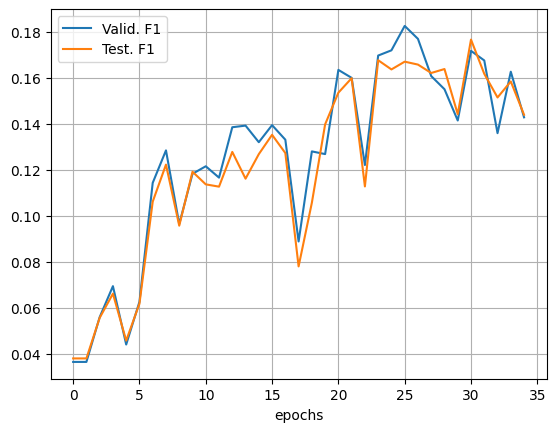

In [ ]:
stats_df = pd.DataFrame(training_stats)[["Valid. F1", "Test. F1"]]
stats_df.plot(xlabel = "epochs", grid = True)

<Axes: xlabel='epochs'>

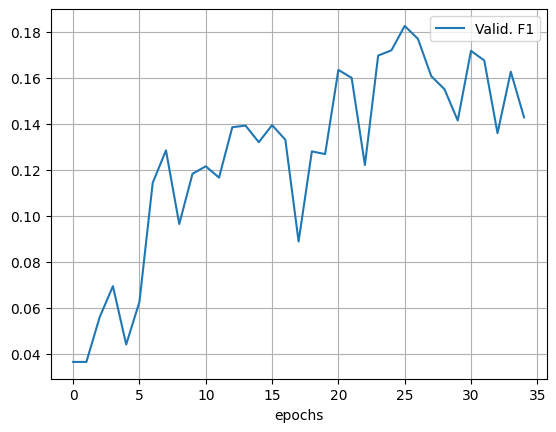

In [ ]:
stats_df = pd.DataFrame(training_stats)[["Valid. F1"]]
stats_df.plot(xlabel = "epochs", grid = True)

<Axes: xlabel='epochs'>

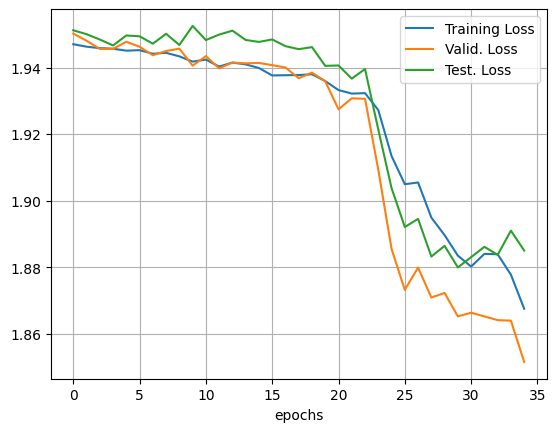

In [ ]:
stats_df = pd.DataFrame(training_stats)[["Training Loss", "Valid. Loss", "Test. Loss"]]
stats_df.plot(xlabel = "epochs", grid = True)

<Axes: xlabel='epochs'>

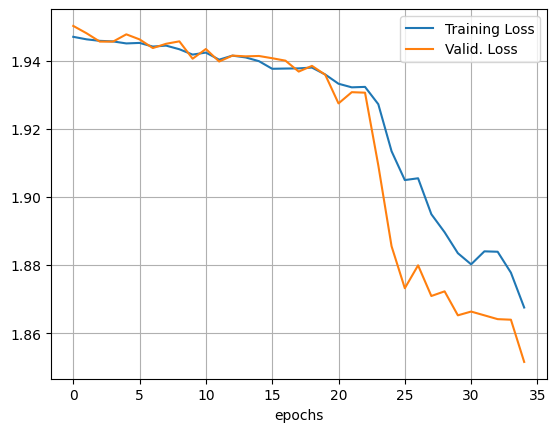

In [ ]:
stats_df = pd.DataFrame(training_stats)[["Training Loss", "Valid. Loss"]]
stats_df.plot(xlabel = "epochs", grid = True)

In [ ]:
# train/val/test (until 45 epochs) (take best val)
torch.manual_seed(2024)

EPOCHS = 45
training_stats = []
total_t0 = time.time()

# For each epoch...
for epoch_i in range(EPOCHS):
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, EPOCHS))
    print('Training...')

    t0 = time.time()
    total_train_loss = 0

    model.train()

    for batch in train:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(input_ids, attention_mask)

        loss = criterion(outputs.permute(0,2,1), labels) ### criterion(outputs.permute(0,2,1), labels)
        total_train_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    avg_train_loss = total_train_loss / len(train)
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.3f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))

    print("")
    print("Running Validation...")

    predictions, true_labels = [], []

    t0 = time.time()

    model.eval()

    # Tracking variables
    total_eval_loss = 0

    # Evaluate data for one epoch
    for batch in dev:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)
        with torch.no_grad():
            outputs = model(input_ids, attention_mask)

        max_out = torch.argmax(outputs, dim = -1).flatten().detach().cpu()
        predictions.extend(max_out)
        true_labels.extend(labels.flatten().detach().cpu())

        loss = criterion(outputs.permute(0,2,1), labels) ### criterion(outputs.permute(0,2,1), labels)
        total_eval_loss += loss.item()

    avg_val_loss = total_eval_loss / len(dev)
    validation_time = format_time(time.time() - t0)

    print("  Validation Loss: {0:.3f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    val_f1 = f1_score(true_labels, predictions, average = "macro")

    print("")
    print("Running Testing...")

    predictions, true_labels = [], []

    t0 = time.time()

    model.eval()

    # Tracking variables
    total_eval_loss = 0

    # Evaluate data for one epoch
    for batch in test:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)
        with torch.no_grad():
            outputs = model(input_ids, attention_mask)

        max_out = torch.argmax(outputs, dim = -1).flatten().detach().cpu()
        predictions.extend(max_out)
        true_labels.extend(labels.flatten().detach().cpu())

        loss = criterion(outputs.permute(0,2,1), labels) ### criterion(outputs.permute(0,2,1), labels)
        total_eval_loss += loss.item()

    avg_test_loss = total_eval_loss / len(test)
    test_time = format_time(time.time() - t0)

    print("  Test Loss: {0:.3f}".format(avg_test_loss))
    print("  Test took: {:}".format(test_time))

    test_f1 = f1_score(true_labels, predictions, average = "macro")
    print(classification_report(true_labels, predictions, target_names = list(label_mapper.keys())))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. F1': val_f1,
            'Test. Loss': avg_test_loss,
            'Test. F1': test_f1,
            'Training Time': training_time,
            'Validation Time': validation_time,
            'Test Time': test_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 45 ========
Training...

  Average training loss: 1.947
  Training epcoh took: 0:00:42

Running Validation...
  Validation Loss: 1.950
  Validation took: 0:00:04

Running Testing...
  Test Loss: 1.951
  Test took: 0:00:10


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     neutral       0.00      0.00      0.00      1256
         joy       0.15      1.00      0.27       402
    surprise       0.00      0.00      0.00       281
       anger       0.00      0.00      0.00       345
     sadness       0.00      0.00      0.00       208
        fear       0.00      0.00      0.00        50
     disgust       0.00      0.00      0.00        68

    accuracy                           0.15      2610
   macro avg       0.02      0.14      0.04      2610
weighted avg       0.02      0.15      0.04      2610


======== Epoch 2 / 45 ========
Training...

  Average training loss: 1.947
  Training epcoh took: 0:00:42

Running Validation...
  Validation Loss: 1.948
  Validation took: 0:00:04

Running Testing...
  Test Loss: 1.950
  Test took: 0:00:10
              precision    recall  f1-score   support

     neutral       0.00      0.00      0.00      1256
         joy       0.15      1.00      0.27       40

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



  Average training loss: 1.946
  Training epcoh took: 0:00:42

Running Validation...
  Validation Loss: 1.947
  Validation took: 0:00:04

Running Testing...
  Test Loss: 1.949
  Test took: 0:00:10


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     neutral       0.00      0.00      0.00      1256
         joy       0.16      0.95      0.27       402
    surprise       0.00      0.00      0.00       281
       anger       0.15      0.07      0.09       345
     sadness       0.00      0.00      0.00       208
        fear       0.00      0.00      0.00        50
     disgust       0.00      0.00      0.00        68

    accuracy                           0.16      2610
   macro avg       0.04      0.15      0.05      2610
weighted avg       0.04      0.16      0.05      2610


======== Epoch 4 / 45 ========
Training...

  Average training loss: 1.945
  Training epcoh took: 0:00:43

Running Validation...
  Validation Loss: 1.947
  Validation took: 0:00:04

Running Testing...
  Test Loss: 1.948
  Test took: 0:00:10


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     neutral       0.00      0.00      0.00      1256
         joy       0.16      0.92      0.27       402
    surprise       0.00      0.00      0.00       281
       anger       0.17      0.11      0.13       345
     sadness       0.00      0.00      0.00       208
        fear       0.00      0.00      0.00        50
     disgust       0.00      0.00      0.00        68

    accuracy                           0.16      2610
   macro avg       0.05      0.15      0.06      2610
weighted avg       0.05      0.16      0.06      2610


======== Epoch 5 / 45 ========
Training...

  Average training loss: 1.946
  Training epcoh took: 0:00:44

Running Validation...
  Validation Loss: 1.947
  Validation took: 0:00:04

Running Testing...
  Test Loss: 1.949
  Test took: 0:00:10


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     neutral       0.00      0.00      0.00      1256
         joy       0.16      0.87      0.26       402
    surprise       0.00      0.00      0.00       281
       anger       0.15      0.16      0.16       345
     sadness       0.00      0.00      0.00       208
        fear       0.00      0.00      0.00        50
     disgust       0.00      0.00      0.00        68

    accuracy                           0.16      2610
   macro avg       0.04      0.15      0.06      2610
weighted avg       0.04      0.16      0.06      2610


======== Epoch 6 / 45 ========
Training...

  Average training loss: 1.944
  Training epcoh took: 0:00:43

Running Validation...
  Validation Loss: 1.949
  Validation took: 0:00:05

Running Testing...
  Test Loss: 1.946
  Test took: 0:00:10
              precision    recall  f1-score   support

     neutral       0.00      0.00      0.00      1256
         joy       0.16      0.56      0.25       40

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



  Average training loss: 1.945
  Training epcoh took: 0:00:43

Running Validation...
  Validation Loss: 1.946
  Validation took: 0:00:04

Running Testing...
  Test Loss: 1.949
  Test took: 0:00:10


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     neutral       0.48      0.04      0.08      1256
         joy       0.16      0.72      0.26       402
    surprise       0.00      0.00      0.00       281
       anger       0.13      0.27      0.18       345
     sadness       0.00      0.00      0.00       208
        fear       0.00      0.00      0.00        50
     disgust       0.00      0.00      0.00        68

    accuracy                           0.17      2610
   macro avg       0.11      0.15      0.07      2610
weighted avg       0.27      0.17      0.10      2610


======== Epoch 8 / 45 ========
Training...

  Average training loss: 1.944
  Training epcoh took: 0:00:43

Running Validation...
  Validation Loss: 1.945
  Validation took: 0:00:05

Running Testing...
  Test Loss: 1.950
  Test took: 0:00:10


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     neutral       0.49      0.03      0.05      1256
         joy       0.16      0.73      0.26       402
    surprise       0.00      0.00      0.00       281
       anger       0.13      0.27      0.18       345
     sadness       0.00      0.00      0.00       208
        fear       0.00      0.00      0.00        50
     disgust       0.00      0.00      0.00        68

    accuracy                           0.16      2610
   macro avg       0.11      0.15      0.07      2610
weighted avg       0.28      0.16      0.09      2610


======== Epoch 9 / 45 ========
Training...

  Average training loss: 1.943
  Training epcoh took: 0:00:44

Running Validation...
  Validation Loss: 1.945
  Validation took: 0:00:05

Running Testing...
  Test Loss: 1.948
  Test took: 0:00:10


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     neutral       0.35      0.01      0.01      1256
         joy       0.16      0.61      0.25       402
    surprise       0.00      0.00      0.00       281
       anger       0.14      0.40      0.20       345
     sadness       0.00      0.00      0.00       208
        fear       0.00      0.00      0.00        50
     disgust       0.00      0.00      0.00        68

    accuracy                           0.15      2610
   macro avg       0.09      0.15      0.07      2610
weighted avg       0.21      0.15      0.07      2610


======== Epoch 10 / 45 ========
Training...

  Average training loss: 1.943
  Training epcoh took: 0:00:43

Running Validation...
  Validation Loss: 1.947
  Validation took: 0:00:05

Running Testing...
  Test Loss: 1.949
  Test took: 0:00:10


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     neutral       0.00      0.00      0.00      1256
         joy       0.16      0.68      0.26       402
    surprise       0.00      0.00      0.00       281
       anger       0.14      0.36      0.20       345
     sadness       0.00      0.00      0.00       208
        fear       0.00      0.00      0.00        50
     disgust       0.00      0.00      0.00        68

    accuracy                           0.15      2610
   macro avg       0.04      0.15      0.07      2610
weighted avg       0.04      0.15      0.07      2610


======== Epoch 11 / 45 ========
Training...

  Average training loss: 1.942
  Training epcoh took: 0:00:43

Running Validation...
  Validation Loss: 1.946
  Validation took: 0:00:05

Running Testing...
  Test Loss: 1.948
  Test took: 0:00:10


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     neutral       0.49      0.30      0.37      1256
         joy       0.17      0.34      0.23       402
    surprise       0.00      0.00      0.00       281
       anger       0.14      0.41      0.20       345
     sadness       0.00      0.00      0.00       208
        fear       0.00      0.00      0.00        50
     disgust       0.00      0.00      0.00        68

    accuracy                           0.25      2610
   macro avg       0.11      0.15      0.11      2610
weighted avg       0.28      0.25      0.24      2610


======== Epoch 12 / 45 ========
Training...

  Average training loss: 1.942
  Training epcoh took: 0:00:43

Running Validation...
  Validation Loss: 1.947
  Validation took: 0:00:05

Running Testing...
  Test Loss: 1.948
  Test took: 0:00:10


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     neutral       0.55      0.18      0.27      1256
         joy       0.16      0.48      0.24       402
    surprise       0.00      0.00      0.00       281
       anger       0.14      0.41      0.21       345
     sadness       0.00      0.00      0.00       208
        fear       0.00      0.00      0.00        50
     disgust       0.00      0.00      0.00        68

    accuracy                           0.21      2610
   macro avg       0.12      0.15      0.10      2610
weighted avg       0.31      0.21      0.19      2610


======== Epoch 13 / 45 ========
Training...

  Average training loss: 1.941
  Training epcoh took: 0:00:43

Running Validation...
  Validation Loss: 1.945
  Validation took: 0:00:05

Running Testing...
  Test Loss: 1.947
  Test took: 0:00:10


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     neutral       0.52      0.44      0.47      1256
         joy       0.19      0.16      0.17       402
    surprise       0.00      0.00      0.00       281
       anger       0.14      0.50      0.22       345
     sadness       0.00      0.00      0.00       208
        fear       0.00      0.00      0.00        50
     disgust       0.00      0.00      0.00        68

    accuracy                           0.30      2610
   macro avg       0.12      0.16      0.12      2610
weighted avg       0.30      0.30      0.28      2610


======== Epoch 14 / 45 ========
Training...

  Average training loss: 1.942
  Training epcoh took: 0:00:44

Running Validation...
  Validation Loss: 1.944
  Validation took: 0:00:05

Running Testing...
  Test Loss: 1.946
  Test took: 0:00:10


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     neutral       0.66      0.05      0.09      1256
         joy       0.16      0.46      0.23       402
    surprise       0.00      0.00      0.00       281
       anger       0.14      0.54      0.22       345
     sadness       0.00      0.00      0.00       208
        fear       0.00      0.00      0.00        50
     disgust       0.00      0.00      0.00        68

    accuracy                           0.17      2610
   macro avg       0.14      0.15      0.08      2610
weighted avg       0.36      0.17      0.11      2610


======== Epoch 15 / 45 ========
Training...

  Average training loss: 1.940
  Training epcoh took: 0:00:44

Running Validation...
  Validation Loss: 1.945
  Validation took: 0:00:05

Running Testing...
  Test Loss: 1.948
  Test took: 0:00:10
              precision    recall  f1-score   support

     neutral       0.52      0.43      0.47      1256
         joy       0.19      0.07      0.10       4

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



  Average training loss: 1.940
  Training epcoh took: 0:00:43

Running Validation...
  Validation Loss: 1.944
  Validation took: 0:00:05

Running Testing...
  Test Loss: 1.948
  Test took: 0:00:10
              precision    recall  f1-score   support

     neutral       0.53      0.36      0.43      1256
         joy       0.16      0.08      0.11       402
    surprise       0.12      0.17      0.14       281
       anger       0.14      0.46      0.21       345
     sadness       0.00      0.00      0.00       208
        fear       0.00      0.00      0.00        50
     disgust       0.00      0.00      0.00        68

    accuracy                           0.27      2610
   macro avg       0.14      0.15      0.13      2610
weighted avg       0.31      0.27      0.27      2610


======== Epoch 17 / 45 ========
Training...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



  Average training loss: 1.938
  Training epcoh took: 0:00:43

Running Validation...
  Validation Loss: 1.942
  Validation took: 0:00:05

Running Testing...
  Test Loss: 1.946
  Test took: 0:00:10


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     neutral       0.62      0.06      0.11      1256
         joy       0.16      0.31      0.21       402
    surprise       0.12      0.23      0.16       281
       anger       0.14      0.49      0.22       345
     sadness       0.00      0.00      0.00       208
        fear       0.00      0.00      0.00        50
     disgust       0.00      0.00      0.00        68

    accuracy                           0.16      2610
   macro avg       0.15      0.15      0.10      2610
weighted avg       0.36      0.16      0.13      2610


======== Epoch 18 / 45 ========
Training...

  Average training loss: 1.939
  Training epcoh took: 0:00:43

Running Validation...
  Validation Loss: 1.946
  Validation took: 0:00:05

Running Testing...
  Test Loss: 1.949
  Test took: 0:00:10


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     neutral       0.55      0.34      0.42      1256
         joy       0.18      0.28      0.22       402
    surprise       0.13      0.10      0.11       281
       anger       0.14      0.39      0.20       345
     sadness       0.00      0.00      0.00       208
        fear       0.00      0.00      0.00        50
     disgust       0.00      0.00      0.00        68

    accuracy                           0.27      2610
   macro avg       0.14      0.16      0.14      2610
weighted avg       0.32      0.27      0.27      2610


======== Epoch 19 / 45 ========
Training...

  Average training loss: 1.937
  Training epcoh took: 0:00:44

Running Validation...
  Validation Loss: 1.939
  Validation took: 0:00:05

Running Testing...
  Test Loss: 1.946
  Test took: 0:00:10


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     neutral       0.61      0.16      0.26      1256
         joy       0.17      0.28      0.21       402
    surprise       0.11      0.26      0.16       281
       anger       0.14      0.38      0.20       345
     sadness       0.25      0.00      0.01       208
        fear       0.00      0.00      0.00        50
     disgust       0.00      0.00      0.00        68

    accuracy                           0.20      2610
   macro avg       0.18      0.16      0.12      2610
weighted avg       0.37      0.20      0.20      2610


======== Epoch 20 / 45 ========
Training...

  Average training loss: 1.935
  Training epcoh took: 0:00:43

Running Validation...
  Validation Loss: 1.937
  Validation took: 0:00:05

Running Testing...
  Test Loss: 1.942
  Test took: 0:00:10


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     neutral       0.57      0.20      0.30      1256
         joy       0.17      0.13      0.15       402
    surprise       0.13      0.31      0.18       281
       anger       0.14      0.45      0.22       345
     sadness       0.04      0.01      0.02       208
        fear       0.00      0.00      0.00        50
     disgust       0.00      0.00      0.00        68

    accuracy                           0.21      2610
   macro avg       0.15      0.16      0.12      2610
weighted avg       0.34      0.21      0.22      2610


======== Epoch 21 / 45 ========
Training...

  Average training loss: 1.933
  Training epcoh took: 0:00:43

Running Validation...
  Validation Loss: 1.929
  Validation took: 0:00:05

Running Testing...
  Test Loss: 1.940
  Test took: 0:00:10
              precision    recall  f1-score   support

     neutral       0.59      0.31      0.41      1256
         joy       0.21      0.11      0.14       4

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



======== Epoch 22 / 45 ========
Training...

  Average training loss: 1.928
  Training epcoh took: 0:00:43

Running Validation...
  Validation Loss: 1.921
  Validation took: 0:00:05

Running Testing...
  Test Loss: 1.925
  Test took: 0:00:10
              precision    recall  f1-score   support

     neutral       0.57      0.37      0.45      1256
         joy       0.25      0.04      0.07       402
    surprise       0.23      0.09      0.13       281
       anger       0.20      0.33      0.25       345
     sadness       0.10      0.44      0.17       208
        fear       0.03      0.10      0.05        50
     disgust       0.00      0.00      0.00        68

    accuracy                           0.28      2610
   macro avg       0.20      0.20      0.16      2610
weighted avg       0.37      0.28      0.29      2610


======== Epoch 23 / 45 ========
Training...

  Average training loss: 1.920
  Training epcoh took: 0:00:43

Running Validation...
  Validation Loss: 1.909
  Va

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     neutral       0.59      0.24      0.34      1256
         joy       0.26      0.03      0.06       402
    surprise       0.20      0.37      0.26       281
       anger       0.21      0.25      0.23       345
     sadness       0.11      0.48      0.18       208
        fear       0.02      0.06      0.03        50
     disgust       0.00      0.00      0.00        68

    accuracy                           0.23      2610
   macro avg       0.20      0.21      0.16      2610
weighted avg       0.38      0.23      0.25      2610


======== Epoch 25 / 45 ========
Training...

  Average training loss: 1.916
  Training epcoh took: 0:00:43

Running Validation...
  Validation Loss: 1.891
  Validation took: 0:00:05

Running Testing...
  Test Loss: 1.906
  Test took: 0:00:10


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     neutral       0.63      0.21      0.31      1256
         joy       0.25      0.04      0.07       402
    surprise       0.18      0.66      0.28       281
       anger       0.21      0.20      0.20       345
     sadness       0.10      0.31      0.15       208
        fear       0.00      0.00      0.00        50
     disgust       0.00      0.00      0.00        68

    accuracy                           0.23      2610
   macro avg       0.20      0.20      0.15      2610
weighted avg       0.40      0.23      0.23      2610


======== Epoch 26 / 45 ========
Training...

  Average training loss: 1.905
  Training epcoh took: 0:00:43

Running Validation...
  Validation Loss: 1.874
  Validation took: 0:00:05

Running Testing...
  Test Loss: 1.891
  Test took: 0:00:10


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     neutral       0.62      0.14      0.23      1256
         joy       0.29      0.05      0.09       402
    surprise       0.20      0.58      0.30       281
       anger       0.24      0.24      0.24       345
     sadness       0.11      0.53      0.18       208
        fear       0.03      0.04      0.03        50
     disgust       0.00      0.00      0.00        68

    accuracy                           0.21      2610
   macro avg       0.21      0.23      0.15      2610
weighted avg       0.41      0.21      0.20      2610


======== Epoch 27 / 45 ========
Training...

  Average training loss: 1.899
  Training epcoh took: 0:00:43

Running Validation...
  Validation Loss: 1.887
  Validation took: 0:00:05

Running Testing...
  Test Loss: 1.898
  Test took: 0:00:10
              precision    recall  f1-score   support

     neutral       0.68      0.15      0.25      1256
         joy       0.20      0.10      0.13       4

<Axes: xlabel='epochs'>

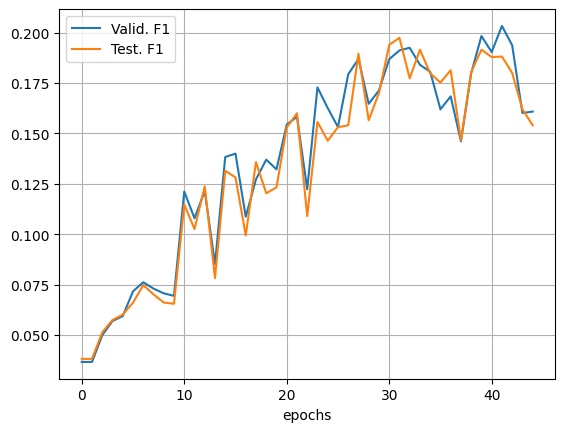

In [ ]:
stats_df = pd.DataFrame(training_stats)[["Valid. F1", "Test. F1"]]
stats_df.plot(xlabel = "epochs", grid = True)

<Axes: xlabel='epochs'>

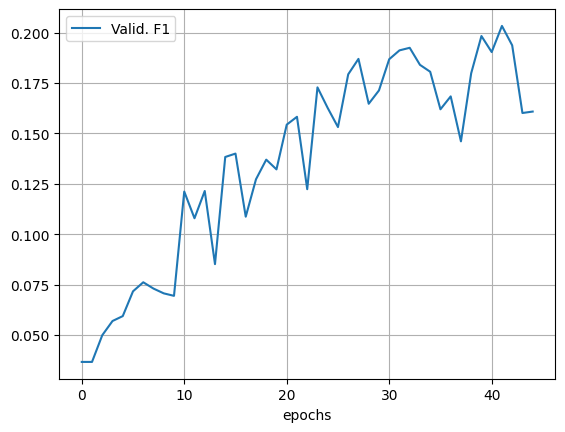

In [ ]:
stats_df = pd.DataFrame(training_stats)[["Valid. F1"]]
stats_df.plot(xlabel = "epochs", grid = True)

<Axes: xlabel='epochs'>

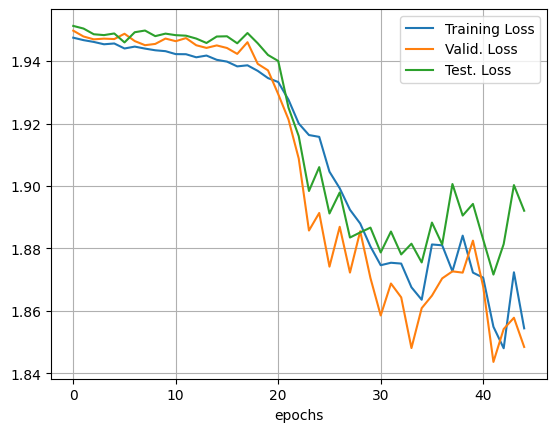

In [ ]:
stats_df = pd.DataFrame(training_stats)[["Training Loss", "Valid. Loss", "Test. Loss"]]
stats_df.plot(xlabel = "epochs", grid = True)

<Axes: xlabel='epochs'>

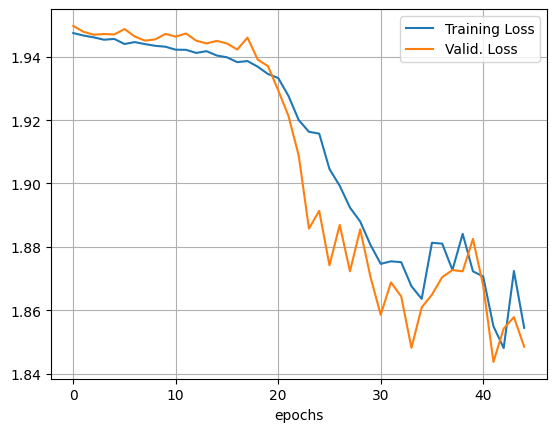

In [ ]:
stats_df = pd.DataFrame(training_stats)[["Training Loss", "Valid. Loss"]]
stats_df.plot(xlabel = "epochs", grid = True)

## Modelling emotions in dialogues using CRF model
- https://www.geeksforgeeks.org/conditional-random-fields-crfs-for-pos-tagging-in-nlp/
- https://sklearn-crfsuite.readthedocs.io/en/latest/tutorial.html#

In [ ]:
from sklearn_crfsuite import metrics

In [ ]:
df = pd.DataFrame(data_diag)
# train_df = df[(df["split"] == "train") | (df["split"] == "dev")]
train_df = df[df["split"] == "train"]
dev_df = df[df["split"] == "dev"]
test_df = df[df["split"] == "test"]

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_path, do_lower_case=True)
bert = AutoModel.from_pretrained(model_path).to("cuda")

In [ ]:
def get_features(x):
    """
    for a dialogue
    """
    encoding = tokenizer.batch_encode_plus(
        x,
        add_special_tokens = True,
        max_length = 70, ###
        padding = 'max_length',
        truncation = 'longest_first',
        return_attention_mask = True,
        return_token_type_ids = False,
        return_tensors = 'pt'
    )
    with torch.no_grad():
        _, cls_embedding = bert(
            input_ids = encoding['input_ids'].to("cuda"),
            attention_mask = encoding['attention_mask'].to("cuda"),
            return_dict = False
        )
    # CRF takse in dictionary of features (need to convert embedding to required format)
    features = [{str(i):v.item() for i, v in enumerate(emb)} for emb in cls_embedding]
    return features

In [ ]:
# Extract features
label_mapper = {"neutral": 0, "joy": 1, "surprise": 2, "anger": 3, "sadness": 4, "fear": 5, "disgust": 6}
X_train = []
y_train = []
for raw, y in zip(train_df["raw"], train_df["y"]):
    X_train.append(get_features(raw))
    y_train.append(y)
X_test = []
y_test = []
for raw, y in zip(test_df["raw"], test_df["y"]):
    X_test.append(get_features(raw))
    y_test.append(y)
X_dev = []
y_dev = []
for raw, y in zip(dev_df["raw"], dev_df["y"]):
    X_dev.append(get_features(raw))
    y_dev.append(y)

In [ ]:
# hyperparameter tuning
parameters = {
    "c1": [0.1, 0.3, 0.5, 0.7],
    "c2": [0.1, 0.3, 0.5, 0.7]
}
perf = {}
for c1 in parameters["c1"]:
    for c2 in parameters["c2"]:
        print(f"Doing {c1}_{c2}...")
        crf = sklearn_crfsuite.CRF(
            algorithm='lbfgs',
            c1=c1,
            c2=c2,
            max_iterations=300,
            all_possible_transitions=True
        )

        try:
            crf.fit(X_train, y_train)
        except AttributeError:
            pass
        y_pred = crf.predict(X_dev)
        perf[f"{c1}_{c2}"] = metrics.flat_f1_score(y_dev, y_pred, average = "macro")
        print(perf[f"{c1}_{c2}"])
        print("-"*80)

Doing 0.1_0.1...
0.2317983059352672
--------------------------------------------------------------------------------
Doing 0.1_0.3...
0.22010498008105667
--------------------------------------------------------------------------------
Doing 0.1_0.5...
0.2109523170692522
--------------------------------------------------------------------------------
Doing 0.1_0.7...
0.1990858003871246
--------------------------------------------------------------------------------
Doing 0.3_0.1...
0.23008507618499427
--------------------------------------------------------------------------------
Doing 0.3_0.3...
0.22308756004112906
--------------------------------------------------------------------------------
Doing 0.3_0.5...
0.2087229832381484
--------------------------------------------------------------------------------
Doing 0.3_0.7...
0.1984151135862699
--------------------------------------------------------------------------------
Doing 0.5_0.1...
0.23027398718881867
------------------------

In [ ]:
# Train a CRF model on the training and dev data (best parameters)
crf = sklearn_crfsuite.CRF(
    algorithm='lbfgs',
    c1=0.1, ###
    c2=0.1, ###
    max_iterations=300,
    all_possible_transitions=True
)

try:
    crf.fit(X_train+X_dev, y_train+y_dev)
except AttributeError:
    pass

In [ ]:
# Make predictions on the test data and evaluate the performance
y_pred = crf.predict(X_test)
print(metrics.flat_f1_score(y_test, y_pred, average = "macro"))

preds = []
labels = []
for i in range(len(y_pred)):
    preds.extend(y_pred[i])
    labels.extend(y_test[i])
print(classification_report(
    labels, preds, digits=3
))

0.2847066145339832
              precision    recall  f1-score   support

       anger      0.488     0.284     0.359       345
     disgust      0.000     0.000     0.000        68
        fear      0.000     0.000     0.000        50
         joy      0.463     0.512     0.486       402
     neutral      0.632     0.911     0.746      1256
     sadness      0.385     0.024     0.045       208
    surprise      0.536     0.267     0.356       281

    accuracy                          0.585      2610
   macro avg      0.358     0.285     0.285      2610
weighted avg      0.528     0.585     0.523      2610



/home/users/nus/e1329380/conda/cs5246/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/users/nus/e1329380/conda/cs5246/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/users/nus/e1329380/conda/cs5246/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

In [ ]:
def print_transitions(trans_features):
    for (label_from, label_to), weight in trans_features:
        print("%-6s -> %-7s %0.6f" % (label_from, label_to, weight))

print("Top likely transitions:")
print_transitions(Counter(crf.transition_features_).most_common(10))

print("\nTop unlikely transitions:")
print_transitions(Counter(crf.transition_features_).most_common()[-10:])

Top likely transitions:
disgust -> disgust 1.773171
fear   -> fear    1.714273
anger  -> anger   1.372169
sadness -> sadness 1.234752
joy    -> joy     0.574423
fear   -> anger   0.556503
surprise -> surprise 0.514965
fear   -> disgust 0.371699
disgust -> sadness 0.347344
disgust -> anger   0.314061

Top unlikely transitions:
joy    -> fear    -0.178799
joy    -> anger   -0.187273
joy    -> neutral -0.207731
joy    -> sadness -0.272896
sadness -> fear    -0.275440
anger  -> joy     -0.426398
disgust -> neutral -0.449679
sadness -> neutral -0.493442
sadness -> joy     -0.548368
disgust -> joy     -0.963704
